Simulation Parameters:
Speed: 25, Angle: 1, Restitution: 0.9, Friction: 0.05, Threshold: 0.1
Target Location: [10, 2]
White Ball Initial Position: [1, 3]
Black Ball Initial Position: [3, 3]
Target Circle Location: [10, 4], Radius: 0.15
Frame 0: White Ball Position: [1, 3], Black Ball Position: [3, 3]


/var/folders/32/28k_71bj62l0r9rcmmrczbgc0000gn/T/ipykernel_32042/2666910121.py:82: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  white_ball.set_data(white_pos[0], white_pos[1])
/var/folders/32/28k_71bj62l0r9rcmmrczbgc0000gn/T/ipykernel_32042/2666910121.py:83: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  black_ball.set_data(black_pos[0], black_pos[1])


Frame 1: White Ball Position: [1.3957730459994049, 2.993091755785242], Black Ball Position: [3.0, 3.0]
Frame 2: White Ball Position: [1.7717574396988396, 2.986528923781222], Black Ball Position: [3.0, 3.0]
Frame 3: White Ball Position: [2.1289426137133023, 2.980294233377403], Black Ball Position: [3.0, 3.0]
Frame 4: White Ball Position: [2.468268529027042, 2.9743712774937747], Black Ball Position: [3.0, 3.0]
Frame 5: White Ball Position: [2.7906281485750943, 2.968744469404328], Black Ball Position: [3.0, 3.0]
Frame 6: White Ball Position: [2.798084629411959, 2.9187956389677443], Black Ball Position: [3.268906641960407, 3.040143026476448]
Frame 7: White Ball Position: [2.80516828620698, 2.87134425005299], Black Ball Position: [3.5243679518227933, 3.0782789016290737]
Frame 8: White Ball Position: [2.81189776016225, 2.8262654305839736], Black Ball Position: [3.7670561961920606, 3.114507983024068]
Frame 9: White Ball Position: [2.818290760419757, 2.783440552088408], Black Ball Position: [3

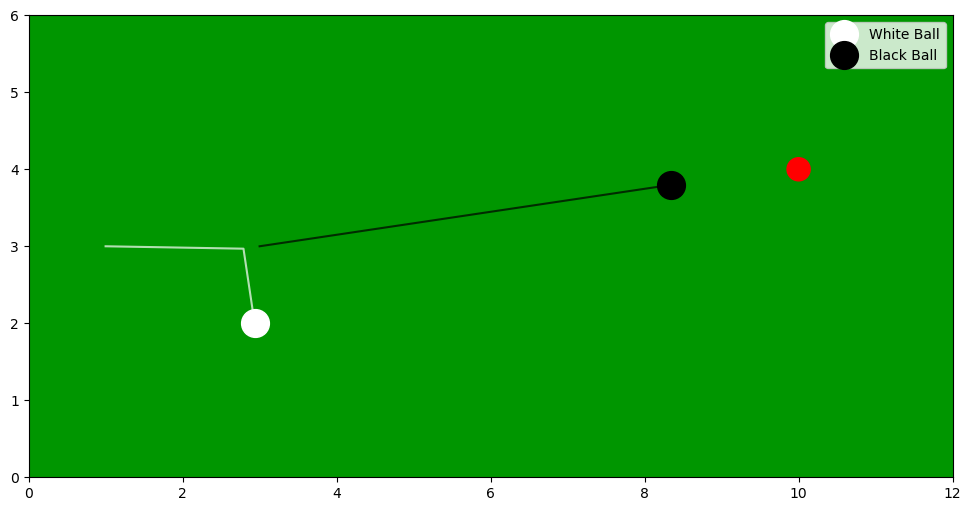

In [7]:
# Import necessary modules
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from momentum_simulation import MomentumSimulator

# Define simulation parameters
speed = 25  # Initial speed of the white ball (units per second)
angle = 1  # Initial angle of the white ball (degrees)
rest_coeff = 0.9  # Coefficient of restitution
friction_coeff = 0.05  # Friction coefficient
min_speed_threshold = 0.1  # Minimum speed threshold to stop motion

# Define target location (x, y)
target_location = [10, 2]

# Debug: Print parameters for verification
print(f"Simulation Parameters:\nSpeed: {speed}, Angle: {angle}, Restitution: {rest_coeff}, Friction: {friction_coeff}, Threshold: {min_speed_threshold}")
print(f"Target Location: {target_location}")

# Create an instance of the MomentumSimulator
simulator = MomentumSimulator(
    speed=speed,
    angle=angle,
    rest_coeff=rest_coeff,
    friction_coeff=friction_coeff,
    min_speed_threshold=min_speed_threshold,
    target_location=target_location
)

# Run the simulation
white_positions, black_positions = simulator.simulate(steps=500)

# Debug: Validate simulation output
if not white_positions or not black_positions:
    raise ValueError("Simulation did not produce any positions. Please check the simulation logic and parameters!")
print(f"White Ball Initial Position: {white_positions[0]}")
print(f"Black Ball Initial Position: {black_positions[0]}")

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.set_facecolor((0, 150 / 255, 0))  # Green background

# Draw the target
target_circle = plt.Circle(simulator.TARGET_LOCATION, simulator.ball_radius, color='red', fill=True)
ax.add_patch(target_circle)

# Initialize the white and black ball plots
white_ball, = ax.plot([], [], 'o', color='white', markersize=20, label='White Ball')
black_ball, = ax.plot([], [], 'o', color='black', markersize=20, label='Black Ball')

# Ball trails
white_trail, = ax.plot([], [], '-', color='white', alpha=0.7)
black_trail, = ax.plot([], [], '-', color='black', alpha=0.7)

# Debug: Ensure the target circle and plot are drawn
print(f"Target Circle Location: {simulator.TARGET_LOCATION}, Radius: {simulator.ball_radius}")

# Initialize the animation
def init():
    white_ball.set_data([], [])
    black_ball.set_data([], [])
    white_trail.set_data([], [])
    black_trail.set_data([], [])
    return white_ball, black_ball, white_trail, black_trail

# Animation update function
def update(frame):
    # Ensure the frame index is valid
    if frame >= len(white_positions):
        return white_ball, black_ball, white_trail, black_trail

    white_pos = white_positions[frame]
    black_pos = black_positions[frame]

    # Debug: Print the positions for each frame
    print(f"Frame {frame}: White Ball Position: {white_pos}, Black Ball Position: {black_pos}")

    # Update ball positions
    white_ball.set_data(white_pos[0], white_pos[1])
    black_ball.set_data(black_pos[0], black_pos[1])

    # Update trails
    white_trail.set_data(*zip(*white_positions[:frame + 1]))
    black_trail.set_data(*zip(*black_positions[:frame + 1]))

    return white_ball, black_ball, white_trail, black_trail

from IPython.display import HTML

# Create the animation
ani = FuncAnimation(
    fig, update, frames=len(white_positions), init_func=init,
    interval=30, blit=True  # interval in milliseconds
)

# Display the animation inline
HTML(ani.to_jshtml())


# Show the animation
plt.legend()
plt.show()
